# Matematikai Algoritmusok és Felfedezések I.

## 10. Előadás: Gráfok és algoritmusok
### 2023 május 10.

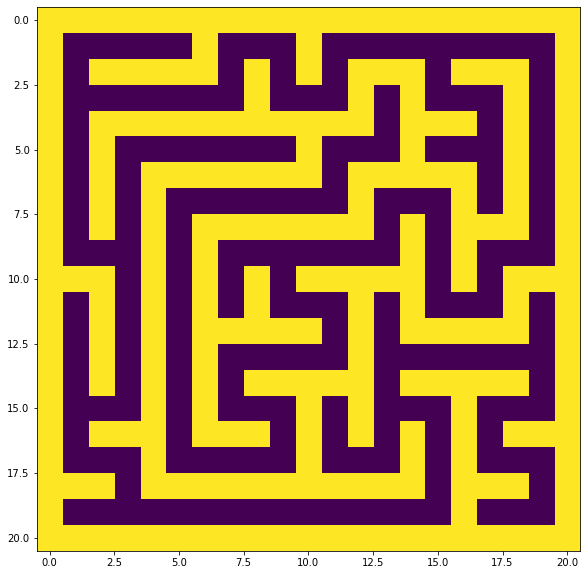

In [4]:
printmaze(makemaze(10,10))

In [43]:
import numpy as np
import random as rn 
import networkx as nx

## Gráf adatstruktúra

Több lehetőség is van, mindnek megvannak az előnyei és hátrányai. 


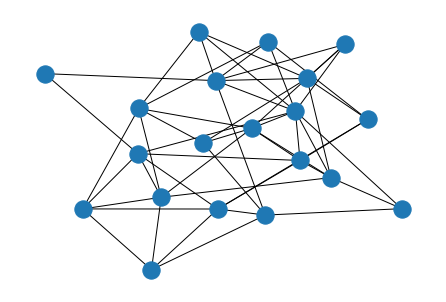

In [3]:
G = nx.erdos_renyi_graph(20, 0.3)
nx.draw(G)

## Első lehetőség: élek listája
Egy listában tároljuk a gráf éleit. 

In [44]:
graph_ellista=[("a","b"),("b","c"),("c","d"),("d","b"),("b","e")]

In [45]:
def maxfok1(l):
    d={}
    for el in l:
        if el[0] in d:
            d[el[0]]=d[el[0]]+1
        else:
            d[el[0]]=1
        if el[1] in d:
            d[el[1]]=d[el[1]]+1
        else:
            d[el[1]]=1
    return max(d,key=lambda x:d[x])        

In [46]:
maxfok1(graph_ellista)

'b'

## Második lehetőség: szomszédsági lista
Minden csúcshoz felírjuk a szomszédait. 

In [47]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        } 

In [48]:
def maxfok2(l):
    return max(l,key=lambda x: len(l[x]) ) 

In [50]:
maxfok2(graph)

'c'

In [51]:
titok={"AL" : [ "FL", "GA", "TN", "MS" ],
"AK" : [ ],
"AZ" : [ "NM", "UT", "NV", "CA" ],
"AR" : [ "LA", "MS", "TN", "MO", "OK", "TX" ],
"CA" : [ "AZ", "NV", "OR" ],
"CO" : [ "NM", "OK", "KS", "NE", "WY", "UT" ],
"CT" : [ "RI", "MA", "NY" ],
"DE" : [ "NJ", "PA", "MD" ],
"DC" : [ "MD", "VA" ],
"FL" : [ "GA", "AL" ],
"GA" : [ "SC", "NC", "TN", "AL", "FL" ],
"HI" : [ ],
"ID" : [ "WA", "OR", "NV", "UT", "WY", "MT" ],
"IL" : [ "WI", "IA", "MO", "KY", "IN" ],
"IN" : [ "IL", "KY", "OH", "MI" ],
"IA" : [ "MN", "SD", "NE", "MO", "IL", "WI" ],
"KS" : [ "OK", "MO", "NE", "CO" ],
"KY" : [ "TN", "VA", "WV", "OH", "IN", "IL", "MO" ],
"LA" : [ "MS", "AR", "TX" ],
"ME" : [ "NH" ],
"MD" : [ "DE", "PA", "WV", "VA", "DC" ],
"MA" : [ "NH", "VT", "NY", "CT", "RI" ],
"MI" : [ "WI", "IN", "OH" ],
"MN" : [ "ND", "SD", "IA", "WI" ],
"MS" : [ "AL", "TN", "AR", "LA" ],
"MO" : [ "AR", "TN", "KY", "IL", "IA", "NE", "KS", "OK" ],
"MT" : [ "ID", "WY", "SD", "ND" ],
"NE" : [ "KS", "MO", "IA", "SD", "WY", "CO" ],
"NV" : [ "AZ", "UT", "ID", "OR", "CA" ],
"NH" : [ "VT", "MA", "ME" ],
"NJ" : [ "NY", "PA", "DE" ],
"NM" : [ "TX", "OK", "CO", "AZ" ],
"NY" : [ "PA", "NJ", "CT", "MA", "VT" ],
"NC" : [ "VA", "TN", "GA", "SC" ],
"ND" : [ "MT", "SD", "MN" ],
"OH" : [ "MI", "IN", "KY", "WV", "PA" ],
"OK" : [ "TX", "AR", "MO", "KS", "CO", "NM" ],
"OR" : [ "CA", "NV", "ID", "WA" ],
"PA" : [ "OH", "WV", "MD", "DE", "NJ", "NY" ],
"RI" : [ "MA", "CT" ],
"SC" : [ "NC", "GA" ],
"SD" : [ "NE", "IA", "MN", "ND", "MT", "WY" ],
"TN" : [ "AL", "GA", "NC", "VA", "KY", "MO", "AR", "MS" ],
"TX" : [ "LA", "AR", "OK", "NM" ],
"UT" : [ "AZ", "CO", "WY", "ID", "NV"],
"VT" : [ "NY", "MA", "NH" ],
"VA" : [ "MD", "DC", "WV", "KY", "TN", "NC" ],
"WA" : [ "OR", "ID" ],
"WV" : [ "VA", "MD", "PA", "OH", "KY" ],
"WI" : [ "MN", "IA", "IL", "MI" ],
"WY" : [ "CO", "NE", "SD", "MT", "ID", "UT" ]}

In [52]:
maxfok2(titok)

'MO'

## Harmadik lehetőség: szomszédsági mátrix


In [53]:
graphszom=np.array([[0,0,1,1],[0,0,0,1],[1,0,0,1],[1,1,1 ,0]])

In [54]:
graphszom

array([[0, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]])

In [55]:
def maxfok3(A):
    return A.sum(axis=0).argmax()

In [56]:
maxfok3(graphszom)

3

## Mikor melyiket válasszuk?
Mint mindig a helyzettől függ, mindegyiknek van előnye is és hátránya is.  

![interpreted](graf.jpg)

**Szomszédsági mátrix**
 - Lassú hozzáadni és törölni a csúcsokat, mivel át kell méretezni a tömböt.
 - Nagy a memória igénye. 
 - Gyorsan kérdezhetjük le az éleket.
 - Algebrai számítások esetén elkerülhetetlen (gráf spektruma, gráf sajátértékei stb..)
 - Sűrű gráfok (sok él van, négyzetesen sok) esetén hasznos.

**Szomszédsági lista**
 - Gyors hozzáadni csúcsokat
 - Kisebb memória igény
 - Lassú lekérdezni
 - Ritka gráfok (kevés él van, mondjuk lineáris sok) esetén hasznos.
 

## Gráf algoritmusok
- Sok valóélet-beli problémát modellezhetünk gráfokkal.
- A hálózatok méretének növekedése miatt egyre fontosabb szerepet kapnak a hatékony algoritmusok.
- Egy algoritmus hatékonysága sok mindent jelenthet. (futásidő, megírási idő, kapott eredmény pontossága stb..)

### Szélességi bejárás

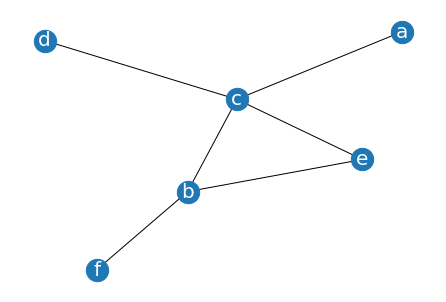

In [57]:
graph = { "a" : ["c"],
          "b" : ["c", "e","f"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : ["b"]
        } 
G = nx.from_dict_of_lists(graph)
nx.draw(G,with_labels=True,font_color='white',font_size=20,node_size=500)

In [58]:
visited = set() # Meglátogatott csúcsok.
queue = []     #Egy sor adatszerkezet, őket még fel kell dolgozni

def bfs(visited, graph, node):
    visited.add(node)
    queue.append(node)

    while queue:
        s = queue.pop(0) 
        print (s, end = " ") 

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

# Driver Code
bfs(visited, graph, 'e')

e c b a d f 

### Mélységi bejárás

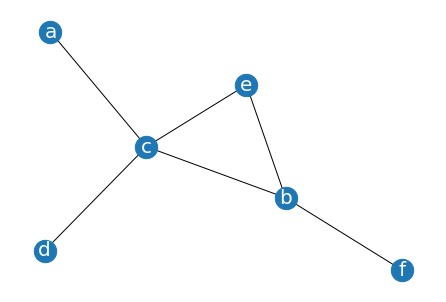

In [59]:
G = nx.from_dict_of_lists(graph)
nx.draw(G,with_labels=True,font_color='white',font_size=20,node_size=500)

In [61]:
visited = set() # Meglátogatott csúcsok

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

dfs(visited, graph, 'a')

a
c
b
e
f
d


## Negyedik lehetőség: valami, amit már megírtak, NetworkX

Több modul van, ami kifejezetten a gráfok kezelésére készült, ebből nézünk meg most egyet.

 NetworkX a háttérben szomszédsági listákkal reprezentálja a gráfot: 

"The graph internal data structures are based on an adjacency list representation and implemented using Python dictionary datastructures. The graph adjacency structure is implemented as a Python dictionary of dictionaries; the outer dictionary is keyed by nodes to values that are themselves dictionaries keyed by neighboring node to the edge attributes associated with that edge. This “dict-of-dicts” structure allows fast addition, deletion, and lookup of nodes and neighbors in large graphs. The underlying datastructure is accessed directly by methods (the programming interface “API”) in the class definitions. All functions, on the other hand, manipulate graph-like objects solely via those API methods and not by acting directly on the datastructure. This design allows for possible replacement of the ‘dicts-of-dicts’-based datastructure with an alternative datastructure that implements the same methods."

In [62]:
import networkx as nx            # Gráfokhoz
import matplotlib.pyplot as plt  # Rajzokhoz
 

Négy gráf adatszerkezet:
- `Graph` irányítatlan, nincsenek párhuzamost élek              
- `DiGraph` irányított, nincsenek párhuzamost élek
- `MultiGraph` irányítatlan, vannak párhuzamost élek
- `MultiDiGraph` irányított, vannak párhuzamost élek

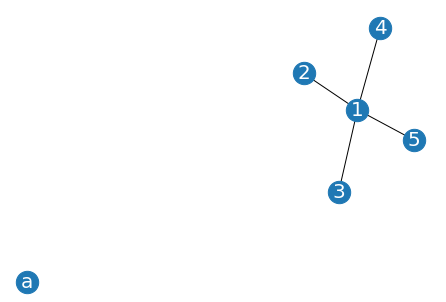

In [63]:
G=nx.Graph()
G.add_node(3)                       # Bármilyen hashelhető típus lehet node. 
G.add_node("a")                       # Bármilyen hashelhető típus lehet node. 
G.add_edge(1,2)
G.add_edges_from([(1,4),(1,3)])
G.add_edge(1,5)
nx.draw(G,with_labels=True,font_color='white',font_size=20,node_size=500)

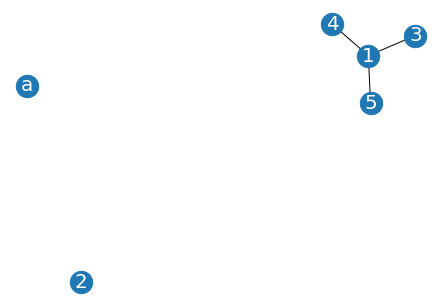

In [64]:
G.remove_edge(1,2)
nx.draw(G,with_labels=True,font_color= 'white',font_size=20,node_size=500)

### Attribútumok
Bármilyen gráfhoz, élhez és csúcshoz tudunk attribútumokat rendelni. Ez sokszor hasznos, például, amikor súlyozott gráfokkal dolgozunk. 


In [65]:
G.add_node("x", time='5pm',col="white")
G.nodes["x"]

{'time': '5pm', 'col': 'white'}

In [66]:
G.add_edge(2, 3, weight=0.9)  # specify edge data
G.add_edge(2, 7, color="green") 
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

### Adatok elérése, iterálás

In [67]:
G.edges()     #Ezzel a függvénnyel elérjük az éleket, de nem tudjuk megváltoztatni őket. 

EdgeView([(3, 1), (3, 2), ('a', 'b'), ('a', 'c'), (1, 4), (1, 5), (2, 7), ('b', 'c'), ('c', 'd')])

In [68]:
G.nodes()

NodeView((3, 'a', 1, 2, 4, 5, 'x', 7, 'b', 'c', 'd'))

In [70]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

In [71]:
print(G[3])
print(G.edges[2,3])
print(G.edges[2,3]["weight"])
 
G.edges[1, 4]['weight'] = 4
print(G.edges[1,4]["weight"])


{1: {}, 2: {'weight': 0.9}}
{'weight': 0.9}
0.9
4


In [72]:
for e in G.edges.items():
      print(e)

((3, 1), {})
((3, 2), {'weight': 0.9})
(('a', 'b'), {'weight': 5.0})
(('a', 'c'), {'weight': 1.0})
((1, 4), {'weight': 4})
((1, 5), {})
((2, 7), {'color': 'green'})
(('b', 'c'), {'weight': 3.0})
(('c', 'd'), {'weight': 7.3})


In [20]:
for u, v, weight in G.edges.data('weight'):
    if weight is not None:
        print(u,v)
        pass

3 2
a b
a c
1 4
b c
c d


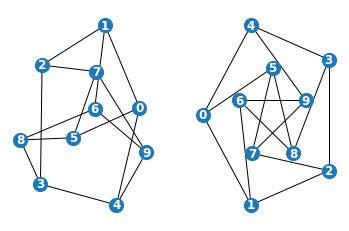

In [73]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True,font_weight='bold',font_color='white',font_size=12,node_size=200)
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',font_color='white',font_size=12,node_size=200)


In [74]:
G.degree()

DegreeView({0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3})

In [75]:
degree_sequence = list(G.degree())
nb_nodes = len(degree_sequence)
nb_arr = len(G.edges())
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [76]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 10
Number of edges : 15
Maximum degree : 3
Minimum degree : 3
Average degree : 3.0
Median degree : 3.0


### Beépített algoritmusok NetworkXben
Teljes lista: [Itt](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)

In [77]:
nx.shortest_path(G)

{0: {0: [0],
  1: [0, 1],
  4: [0, 4],
  5: [0, 5],
  2: [0, 1, 2],
  6: [0, 1, 6],
  3: [0, 4, 3],
  9: [0, 4, 9],
  7: [0, 5, 7],
  8: [0, 5, 8]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  6: [1, 6],
  4: [1, 0, 4],
  5: [1, 0, 5],
  3: [1, 2, 3],
  7: [1, 2, 7],
  8: [1, 6, 8],
  9: [1, 6, 9]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  7: [2, 7],
  0: [2, 1, 0],
  6: [2, 1, 6],
  4: [2, 3, 4],
  8: [2, 3, 8],
  5: [2, 7, 5],
  9: [2, 7, 9]},
 3: {3: [3],
  2: [3, 2],
  4: [3, 4],
  8: [3, 8],
  1: [3, 2, 1],
  7: [3, 2, 7],
  0: [3, 4, 0],
  9: [3, 4, 9],
  5: [3, 8, 5],
  6: [3, 8, 6]},
 4: {4: [4],
  0: [4, 0],
  3: [4, 3],
  9: [4, 9],
  1: [4, 0, 1],
  5: [4, 0, 5],
  2: [4, 3, 2],
  8: [4, 3, 8],
  6: [4, 9, 6],
  7: [4, 9, 7]},
 5: {5: [5],
  0: [5, 0],
  7: [5, 7],
  8: [5, 8],
  1: [5, 0, 1],
  4: [5, 0, 4],
  2: [5, 7, 2],
  9: [5, 7, 9],
  3: [5, 8, 3],
  6: [5, 8, 6]},
 6: {6: [6],
  1: [6, 1],
  8: [6, 8],
  9: [6, 9],
  0: [6, 1, 0],
  2: [6, 1, 2],
  3: [6, 8, 3],
  5: [

In [78]:
for l in  nx.enumerate_all_cliques(G):
    print(l)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 1]
[0, 4]
[0, 5]
[1, 2]
[1, 6]
[2, 3]
[2, 7]
[3, 4]
[3, 8]
[4, 9]
[5, 7]
[5, 8]
[6, 8]
[6, 9]
[7, 9]


[3, 1, 2, 6, 0, 1, 0, 2]

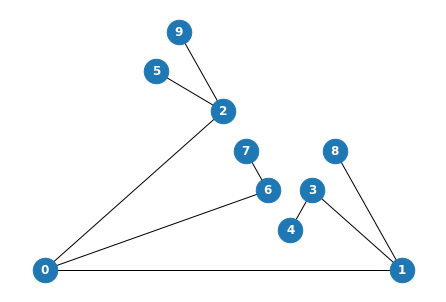

In [79]:
n=10
T=nx.Graph()
T.add_nodes_from(range(n))
for i in range(1,n):
    T.add_edge(i,rn.randrange(i))
nx.draw_planar(T, with_labels=True, width=1, font_weight='bold',font_color='white',font_size=12,node_size=600)
nx.to_prufer_sequence(T)

### Rajzolás 

- `draw(G, keywrds)`
- `raw_circular(G, keywrds)`  
- `draw_planar(G, keywrds)` 
- `draw_random(G, keywrds)`  
- `draw_spectral(G, keywrds)` 
- `draw_spring(G, keywrds)` 
- `draw_shell(G, keywrds)` 

(True, <networkx.algorithms.planarity.PlanarEmbedding object at 0x0000021939B11BC8>)


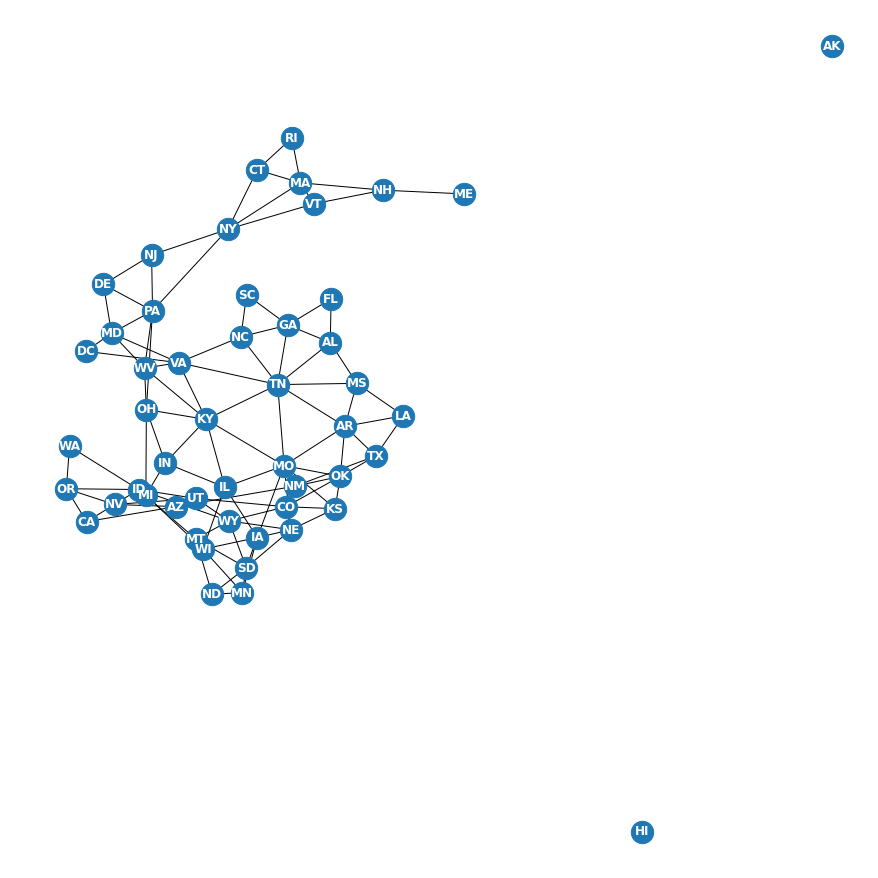

In [80]:
g = nx.from_dict_of_lists(titok)
print(nx.check_planarity(g))
plt.figure(1,figsize=(12,12))
nx.draw_spring(g, with_labels=True, width=1 ,font_weight='bold',font_color='white',font_size=12,node_size=500)
plt.show()

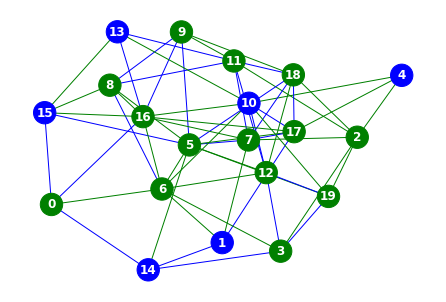

In [42]:
G = nx.erdos_renyi_graph(20, 0.3)
color_map = []
edge_map = []
for edge in G.edges():
    if rn.randrange(2)%2==0:
        edge_map.append('blue')
    else:     
        edge_map.append('green')
   
for node in G:
    if rn.randrange(2)%2==0:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map,edge_color=edge_map, with_labels=True ,font_weight='bold',font_color='white',font_size=12,node_size=500)


# Ötödik lehetőség: gráf algoritmusok gráfok nélkül

Sokszor nem éri meg külön felépíteni egy gráfot, végrehajthatjuk az algoritmust magán az adatokon. Példaképpen most készítünk egy labirintust mélységi bejárás segítségével. 

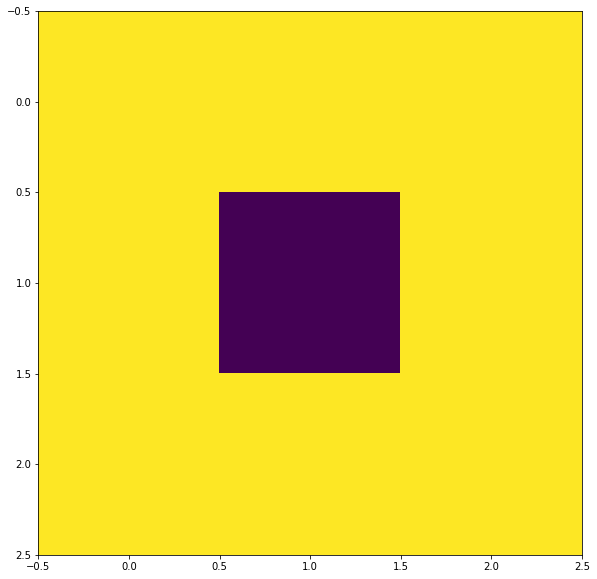

In [81]:
# labirintus rajzoló. Egy 0/1/2 numpy tömböt vár. 0-semmi, 1-fal, 2-pozíció 
import matplotlib.pyplot as plt
def printmaze(image):
    fig = plt.figure(figsize = (10,10))  
    ax = fig.add_subplot(111)
    ax.imshow(image)
    plt.show()
printmaze(np.array([[1,1,1],[1,0,1],[1,1 ,1]]))            

In [111]:
#Labirintus
def foo():
    for i in range(10**7):
        a=2+2
def makemaze(w=16,h=8):
    maze=np.ones((2*w+1,2*h+1))
    vis=np.zeros((2*w+1,2*h+1))
  
    def walk(x, y):
        vis[x,y] = 1
        maze[x,y]=0
          
        d = [(x - 2, y), (x, y + 2), (x + 2, y), (x, y - 2)]
        rn.shuffle(d)
        
        for (xx, yy) in d:
            if (not xx in range(2*w+1)) or (not yy in range(2*h+1)) or vis[xx][yy]: 
                continue
            if xx == x: 
                maze[x][max(y, yy)-1] = 0
            if yy == y: 
                maze[max(x, xx)-1][y] = 0
            walk(xx, yy)

    walk(2*rn.randrange(w)+1, 2*rn.randrange(h)+1)
    foo()
    return maze


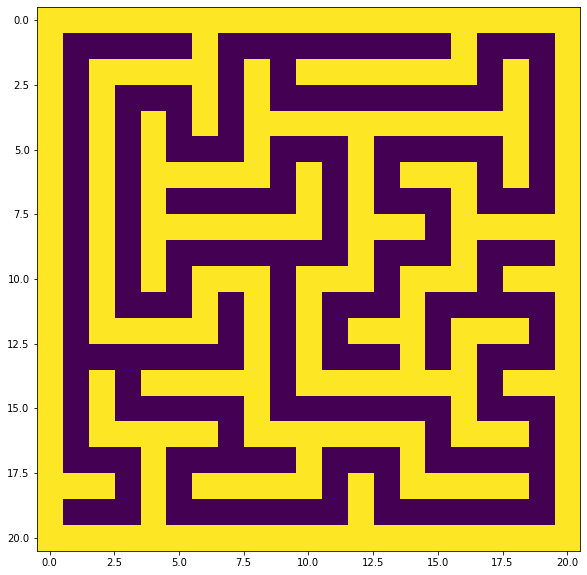

In [102]:
printmaze(makemaze(10,10))

In [112]:
import cProfile

cProfile.run('makemaze(10,10)')

         1571 function calls (1472 primitive calls) in 0.346 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
        1    0.345    0.345    0.345    0.345 <ipython-input-111-0f189c699263>:2(foo)
        1    0.000    0.000    0.346    0.346 <ipython-input-111-0f189c699263>:5(makemaze)
    100/1    0.001    0.000    0.001    0.001 <ipython-input-111-0f189c699263>:9(walk)
        1    0.000    0.000    0.346    0.346 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 multiarray.py:1071(copyto)
        1    0.000    0.000    0.000    0.000 numeric.py:149(ones)
        2    0.000    0.000    0.000    0.000 random.py:174(randrange)
      302    0.000    0.000    0.000    0.000 random.py:224(_randbelow)
      100    0.000    0.000    0.000    0.000 random.py:264(shuffle)
        1    0.000    0.000    0.346    0.346 {built-in me